In [36]:
# Regression Neural Network

In [37]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
# Importing prepared dataset
import pickle
input = open('data_reg.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

In [39]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(np.array([[i] for i in y_train]))
y_train = sc_y.transform(np.array([[i] for i in y_train]))
y_test = sc_y.transform(np.array([[i] for i in y_test]))

In [40]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [41]:
# Initialising the ANN
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(output_dim = 6, activation = 'tanh', input_dim = 3))

# Adding the second hidden layer
rnn.add(Dense(output_dim = 4, activation = 'tanh'))

# Adding the output layer
rnn.add(Dense(output_dim = 1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

C:\Users\kater\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", input_dim=3, units=6)`
  """
C:\Users\kater\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", units=4)`
  
C:\Users\kater\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  # This is added back by InteractiveShellApp.init_path()


In [42]:
# Fitting the ANN to the Training set
rnn.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

C:\Users\kater\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
173/173 [==============================] - 0s 1ms/step - loss: 0.8175 - accuracy: 0.0000e+00
Epoch 2/100
173/173 [==============================] - 0s 196us/step - loss: 0.7220 - accuracy: 0.0000e+00
Epoch 3/100
173/173 [==============================] - 0s 237us/step - loss: 0.6512 - accuracy: 0.0000e+00
Epoch 4/100
173/173 [==============================] - 0s 231us/step - loss: 0.5872 - accuracy: 0.0000e+00
Epoch 5/100
173/173 [==============================] - 0s 202us/step - loss: 0.5418 - accuracy: 0.0000e+00
Epoch 6/100
173/173 [==============================] - 0s 220us/step - loss: 0.5030 - accuracy: 0.0000e+00
Epoch 7/100
173/173 [==============================] - 0s 208us/step - loss: 0.4717 - accuracy: 0.0000e+00
Epoch 8/100
173/173 [==============================] - 0s 243us/step - loss: 0.4443 - accuracy: 0.0000e+00
Epoch 9/100
173/173 [==============================] - 0s 220us/step - loss: 0.4217 - accuracy: 0.0000e+00
Epoch 10/100
173/173 [=================

Epoch 77/100
173/173 [==============================] - 0s 202us/step - loss: 0.1893 - accuracy: 0.0000e+00
Epoch 78/100
173/173 [==============================] - 0s 179us/step - loss: 0.1892 - accuracy: 0.0000e+00
Epoch 79/100
173/173 [==============================] - 0s 202us/step - loss: 0.1892 - accuracy: 0.0000e+00
Epoch 80/100
173/173 [==============================] - 0s 173us/step - loss: 0.1867 - accuracy: 0.0000e+00
Epoch 81/100
173/173 [==============================] - 0s 191us/step - loss: 0.1857 - accuracy: 0.0000e+00
Epoch 82/100
173/173 [==============================] - 0s 196us/step - loss: 0.1846 - accuracy: 0.0000e+00
Epoch 83/100
173/173 [==============================] - 0s 196us/step - loss: 0.1869 - accuracy: 0.0000e+00
Epoch 84/100
173/173 [==============================] - 0s 208us/step - loss: 0.1840 - accuracy: 0.0000e+00
Epoch 85/100
173/173 [==============================] - 0s 208us/step - loss: 0.1848 - accuracy: 0.0000e+00
Epoch 86/100
173/173 [======

In [43]:
# Predicting the Test set results
y_pred = rnn.predict(X_test)

In [44]:
# Inversing scaling
#yhat = pd.DataFrame(yhat, columns=['yhat']) 
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

In [45]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat)

941752641.4443623

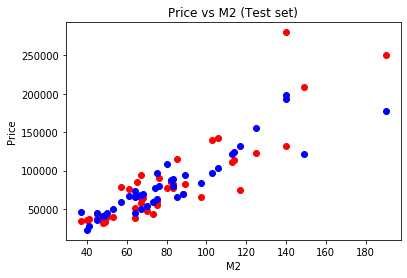

In [46]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], y_hat, 'bo')
plt.title('Price vs M2 (Test set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()